# **Waze Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

# **Course 3 End-of-course project: Exploratory data analysis**

<br/>

**The purpose** of this project is to conduct exploratory data analysis (EDA) on a provided dataset. This activity has 4 parts:

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration, Data cleaning

**Part 3:** Building visualizations

**Part 4:** Evaluating and sharing results

<br/>

# **Visualize a story in Python**

In [119]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df = pd.read_csv('waze_dataset.csv')

### Data exploration and cleaning






#### **Data overview and summary statistics**

In [121]:
df.shape

(14999, 13)

In [122]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [123]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


Consider the following questions as you prepare to deal with outliers:

1.   What are some ways to identify outliers?
2.   How do you make the decision to keep or exclude outliers from any future models?

1. Looking at min-max-avg-std values and/or visualize data
2. Identifying data type, then deciding if it is useful for or analysis of not


### Checking data for correctness

Text(0, 0.5, 'Total kilometers driven during the month')

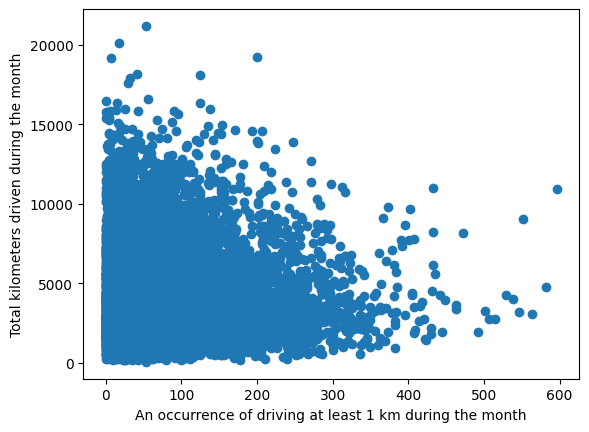

In [125]:
plt.scatter(df["drives"], df["driven_km_drives"])
plt.xlabel("An occurrence of driving at least 1 km during the month")
plt.ylabel("Total kilometers driven during the month")

We can observe that there are users with 0 drives and still some kms driven. This cannot be correct, let's see how many they are:

In [126]:
df[(df["drives"] == 0) & (df["driven_km_drives"] > 0)].shape

(106, 13)

In [127]:
df[(df["driven_km_drives"] == 0) & (df["drives"] > 0)].shape

(0, 13)

In [132]:
df[(df["driving_days"] == 0) & (df["drives"] > 0)].shape

(1017, 13)

In [133]:
df[(df["driving_days"] == 0) & (df["driven_km_drives"] > 0)].shape

(1024, 13)

##### Now let's look at day metrics

`activity_days` defined as `Number of days the user opens the app during the month` and `sessions` defined as `The number of occurrence of a user opening the app during the month` should be either equal or the `sessions` value should be higher (if a user had multiple sessions over a day). Let's see if that's true

In [129]:
df[df["activity_days"] > df["sessions"]].shape

(2458, 13)

It is not, there are a lot of rows not adhering to this rule. 
The same relationship as described above should be correct for `drives` (An occurrence of driving at least 1 km during the month) and `driving_days`(Number of days the user drives (at least 1 km) during the month):

In [130]:
df[df["driving_days"] > df["drives"]].shape

(2167, 13)

There are 2167 where this rule is also not in place. Finally, we'll compare `activity_days` and `driving_days`

In [131]:
df[df["activity_days"] < df["driving_days"]].shape

(0, 13)

##### Now, there is a column `total_sessions` that is defined as "A model estimate of the total number of sessions since a user has onboarded" -- let's see how good this estimate is

In [86]:
df[(df["total_navigations_fav1"] + df["total_navigations_fav2"]) > df["total_sessions"]].shape

(5737, 13)

We can observe that for 5737 entries this estimate is smaller than the sum of navigations to 2 user's favourite places, which is totally incorrect. This estimate is unreliable, so we should avoid using it for features or do it with extra care (the value is too big to just drop these rows!)

##### 💡 My suggestion is to drop the rows that are incorrect, since we don't know where the mistakes are exactly (e.g. if drives == 0, but kms > 0, which of the values is incorrect for this particular user?)

In [134]:
df.drop(df[(df["drives"] == 0) & (df["driven_km_drives"] > 0)].index, inplace=True)
df.drop(df[df["activity_days"] > df["sessions"]].index, inplace=True)
df.drop(df[df["driving_days"] > df["drives"]].index, inplace=True)
df.drop(df[(df["driving_days"] == 0) & (df["drives"] > 0)].index, inplace=True)
df.drop(df[(df["driving_days"] == 0) & (df["driven_km_drives"] > 0)].index, inplace=True)

In [135]:
df.shape

(11469, 13)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11469 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       11469 non-null  int64  
 1   label                    10925 non-null  object 
 2   sessions                 11469 non-null  int64  
 3   drives                   11469 non-null  int64  
 4   total_sessions           11469 non-null  float64
 5   n_days_after_onboarding  11469 non-null  int64  
 6   total_navigations_fav1   11469 non-null  int64  
 7   total_navigations_fav2   11469 non-null  int64  
 8   driven_km_drives         11469 non-null  float64
 9   duration_minutes_drives  11469 non-null  float64
 10  activity_days            11469 non-null  int64  
 11  driving_days             11469 non-null  int64  
 12  device                   11469 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.2+ MB


### Handling the missing data
Let's remove NaN values

In [137]:
df.dropna(axis=0, inplace=True)

In [138]:
df.shape

(10925, 13)

In [139]:
df.to_csv("waze_dataset_no_nans_no_incorrect_data.csv")

### Visualizations

Let's begin by examining the spread and distribution of important variables using box plots and histograms.

In [140]:
def get_median(datasource, column_title, round_to_n=1):
    return round(datasource[column_title].median(), round_to_n)

def get_mean(datasource, column_title, round_to_n=1):
    return round(datasource[column_title].mean(), round_to_n)

def print_central_tendency_metrics(datasource, column_title, round_to_n=1):
    median = get_median(datasource, column_title, round_to_n=round_to_n)
    mean = get_mean(datasource, column_title, round_to_n=round_to_n)
    print(f"{column_title}: median = {median}, mean = {mean}")

def boxplotter(datasource, column_title, plot_title=None, **kwargs):
    default_figure_size = (8,2)
    default_flier_size = 3
    plt.figure(figsize=default_figure_size)
    sns.boxplot(x=datasource[column_title], fliersize=default_flier_size)
    if not plot_title:
        plot_title = f'{column_title} box plot'
    plt.title(plot_title)
    
def histplotter(datasource, column_title, plot_title=None, **kwargs):                                                        
    median = get_median(datasource, column_title)
    plt.figure(figsize=(15,5))
    ax = sns.histplot(x=datasource[column_title], **kwargs)            
    plt.axvline(median, color='red', linestyle='--')
    plt.xlabel(column_title)
    plt.ylabel('count')
    if not plot_title:
        plot_title = f'{column_title} histogram'
    plt.title(plot_title)
    

#### **`sessions`**

_The number of occurrence of a user opening the app during the month_

sessions: median = 72.0, mean = 96.5


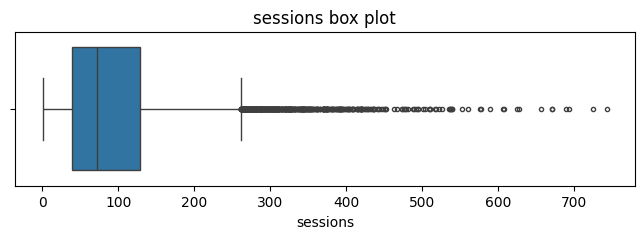

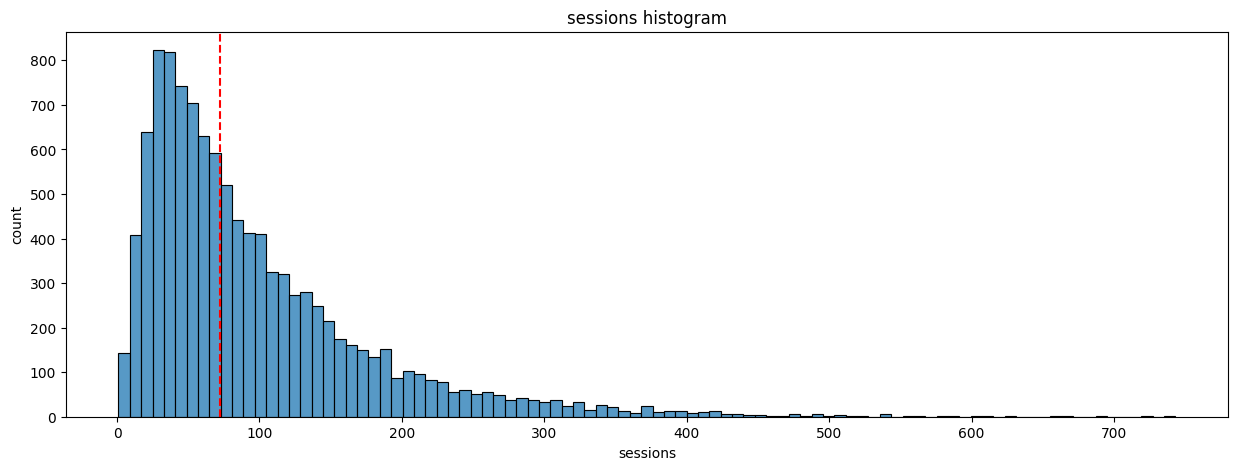

In [141]:
print_central_tendency_metrics(df, 'sessions')
boxplotter(df, 'sessions')
histplotter(df, 'sessions')

The `sessions` variable is a right-skewed distribution with half of the observations having 72 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

drives: median = 61.0, mean = 80.4


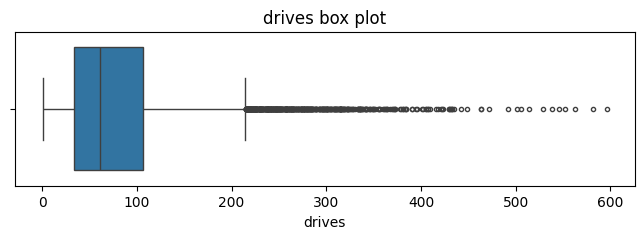

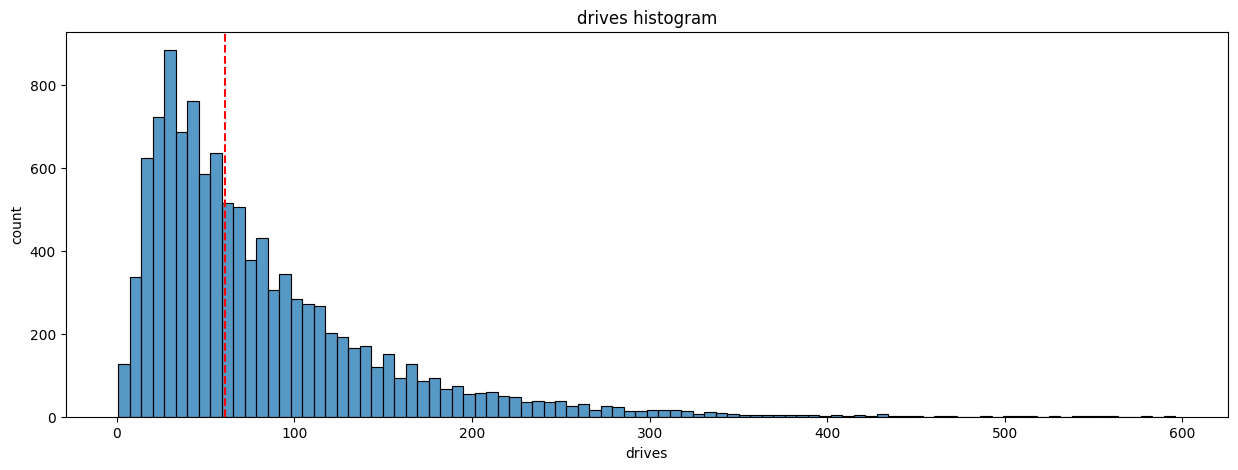

In [142]:
columnn = 'drives'
print_central_tendency_metrics(df, columnn)
boxplotter(df, columnn) 
histplotter(df, columnn)

The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 61. However, some drivers had over 400 drives in the last month.

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

n_days_after_onboarding: median = 1757.0, mean = 1754.0


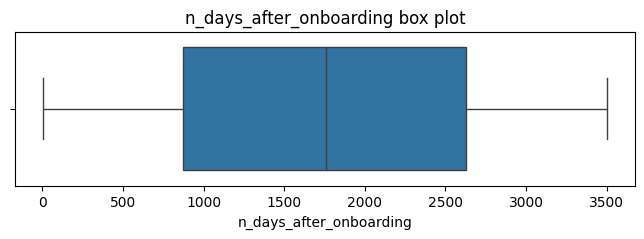

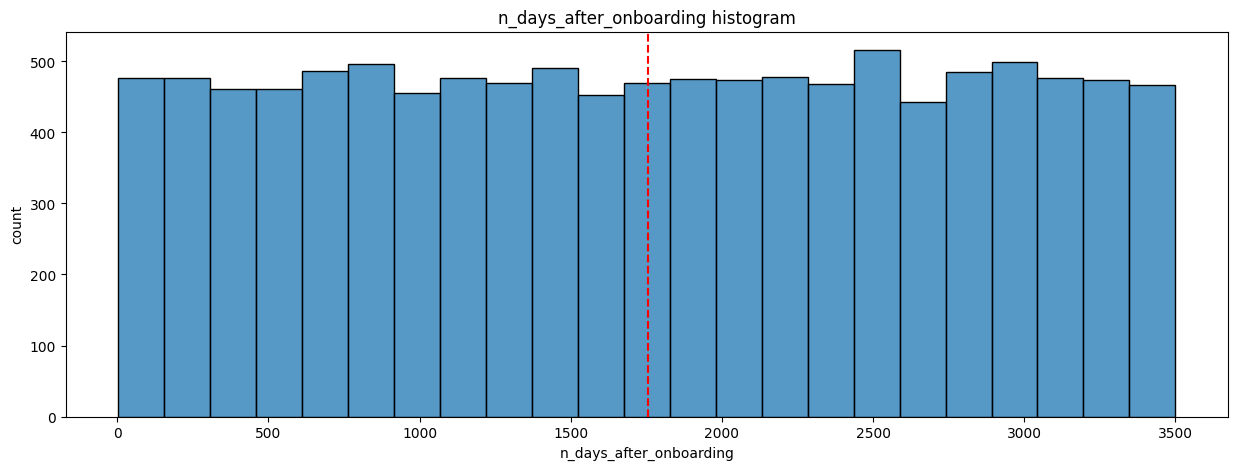

In [143]:
column = 'n_days_after_onboarding'
print_central_tendency_metrics(df, column)
boxplotter(df, column) 
histplotter(df, column)

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`driven_km_drives`**

_Total kilometers driven during the month_

driven_km_drives: median = 3507.5, mean = 4044.2


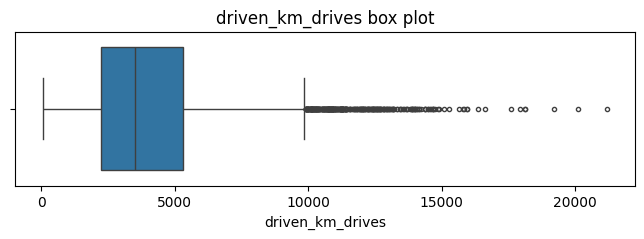

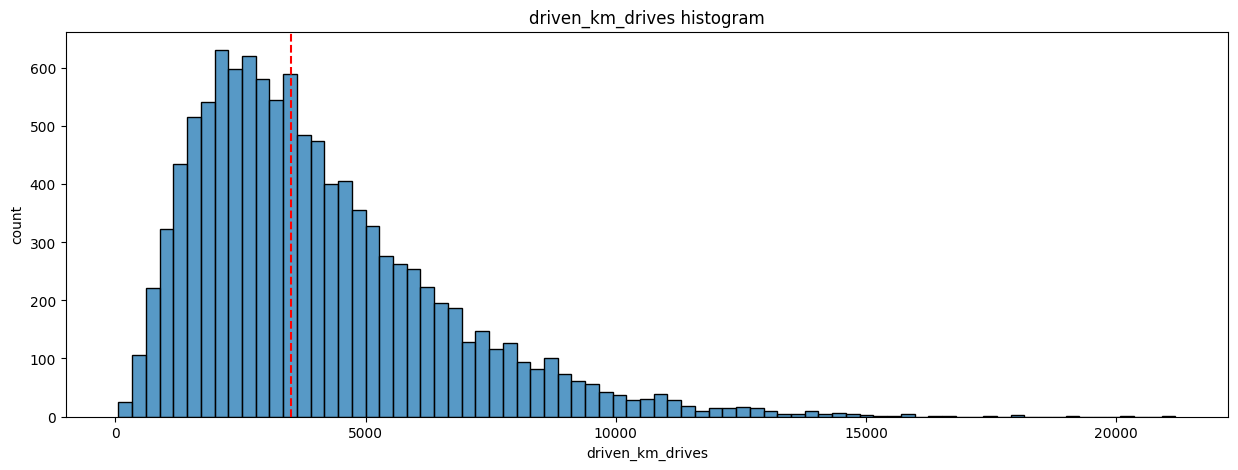

In [144]:
column = 'driven_km_drives'
print_central_tendency_metrics(df, column)
boxplotter(df, column) 
histplotter(df, column)

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3500 kilometers, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth, which appears to be a mistake

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

duration_minutes_drives: median = 1481.7, mean = 1859.6


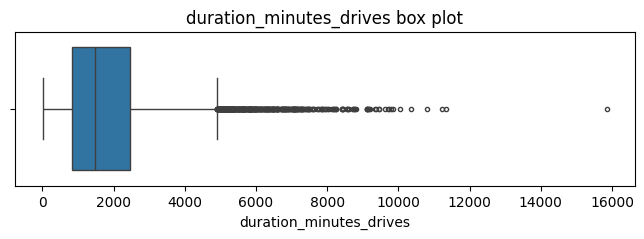

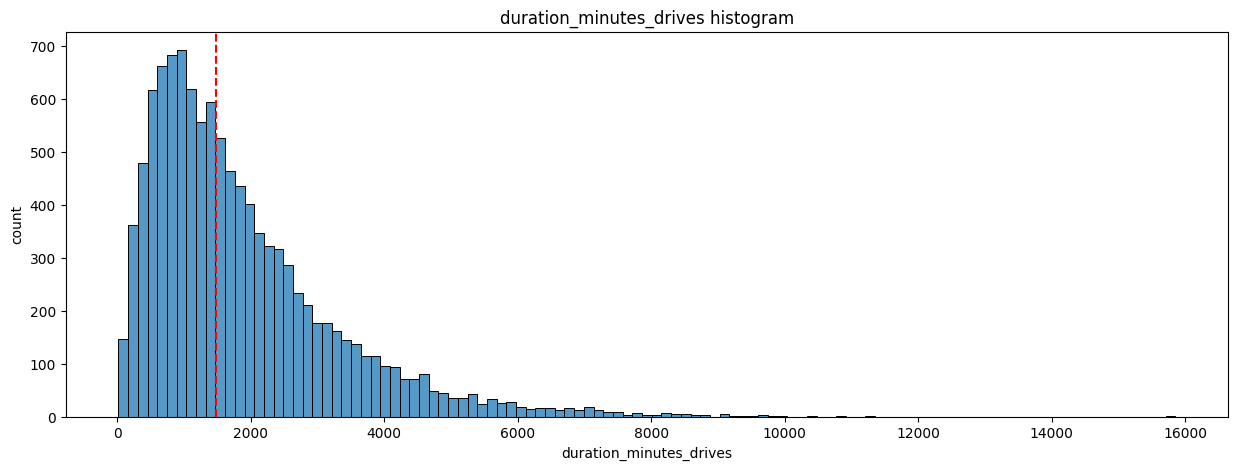

In [145]:
column = 'duration_minutes_drives'
print_central_tendency_metrics(df, column)
boxplotter(df, column) 
histplotter(df, column)

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,481 minutes (\~25 hours, or less than an hour per day monthly), but some users clocked over 250 hours over the month (which is around 8h daily)

#### **`activity_days`**

_Number of days the user opens the app during the month_

activity_days: median = 15.0, mean = 15.7


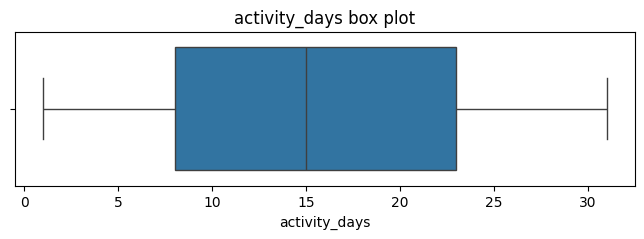

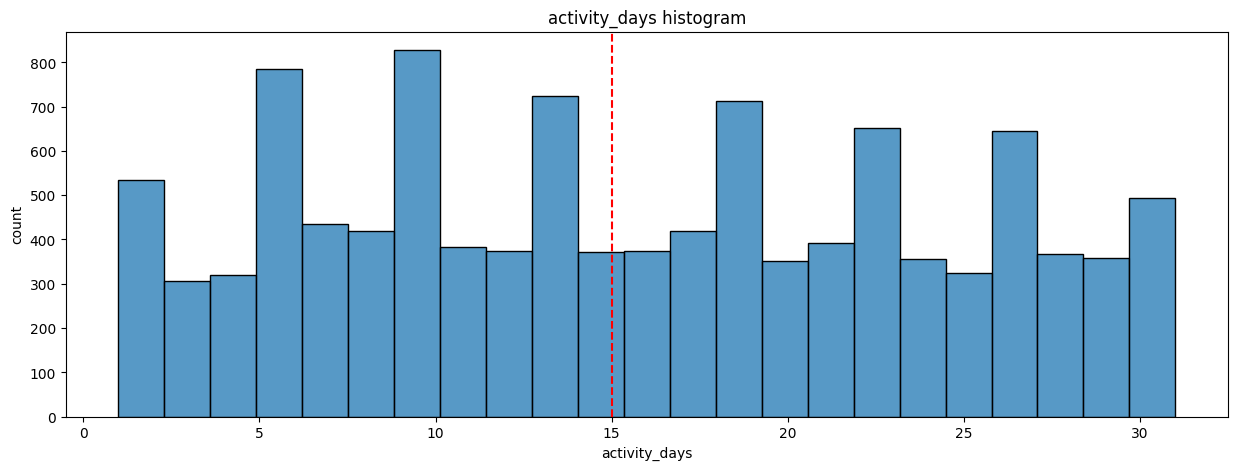

In [146]:
column = 'activity_days'
print_central_tendency_metrics(df, column)
boxplotter(df, column) 
histplotter(df, column)

Within the last month, users opened the app a median of 15 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which you might think would be closely correlated with `activity_days`.

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

driving_days: median = 12.0, mean = 12.3


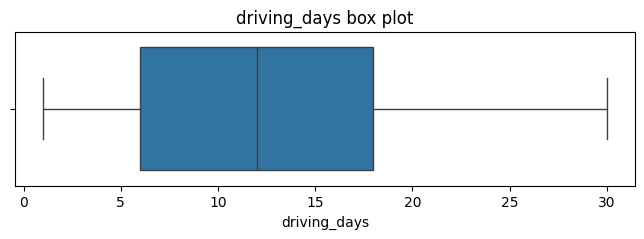

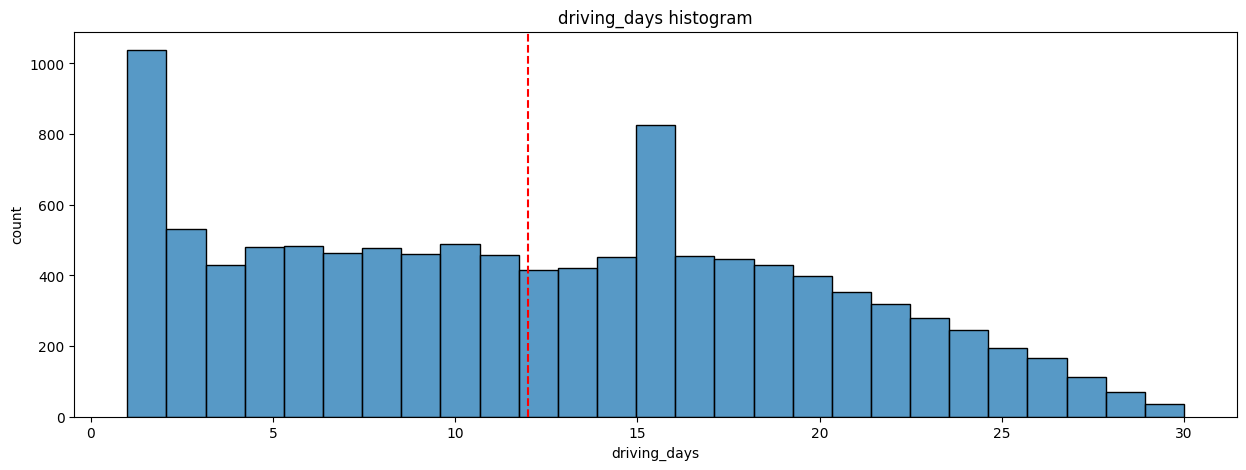

In [147]:
column = 'driving_days'
print_central_tendency_metrics(df, column)
boxplotter(df, column) 
histplotter(df, column)

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

#### **`device`**

_The type of device a user starts a session with_

This is a categorical variable, so you do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

In [148]:
def piecharter(datasource, column):
    fig = plt.figure(figsize=(5,5))
    data=datasource[column].value_counts()
    plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
    plt.title(f'Users by {column}')

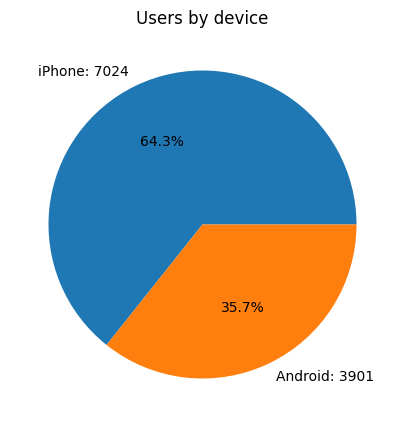

In [149]:
piecharter(df, 'device')


2/3 of users are on iPhone, and 1/3 uses Android

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.

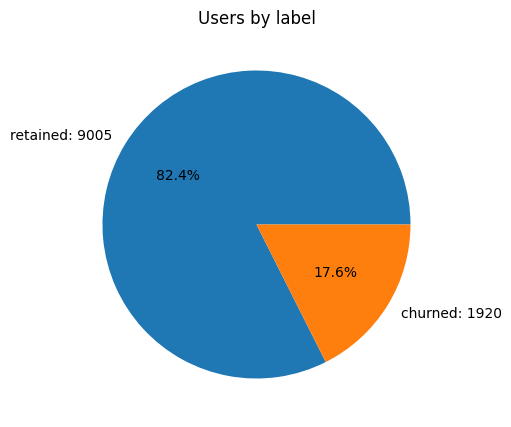

In [150]:
piecharter(df, 'label')

17.6 % of the users churned.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `activity_days`.

Text(0.5, 1.0, 'driving_days vs. activity_days')

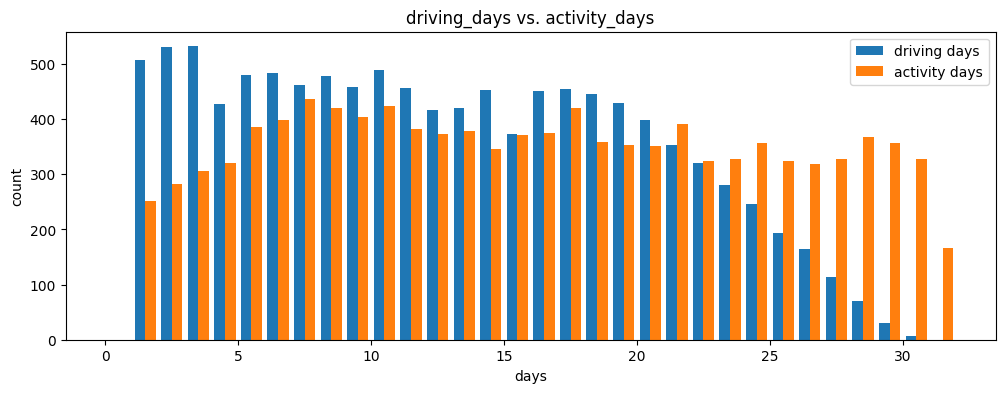

In [151]:
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days')

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [152]:
print(df['driving_days'].max(), df['activity_days'].max())

30 31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

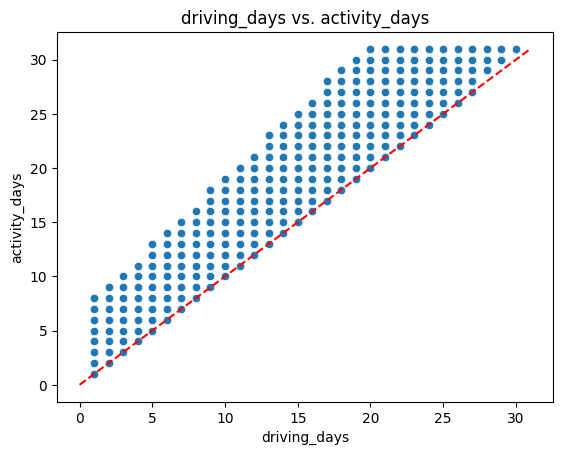

In [153]:
# Scatter plot
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--')

Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### **Retention by device**

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

Text(0.5, 1.0, 'Retention by device histogram')

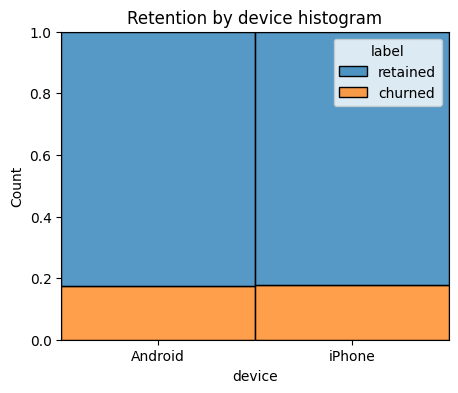

In [154]:
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='fill'
             )
plt.title('Retention by device histogram')

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [155]:
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
df['km_per_driving_day'].describe()

count    10925.000000
mean       682.957016
std       1124.076334
min          3.022063
25%        168.775702
50%        319.407852
75%        662.486386
max      14867.817280
Name: km_per_driving_day, dtype: float64

What do you notice? The mean value is infinity, the standard deviation is NaN, and the max value is infinity. Why do you think this is?

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [156]:
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0
df['km_per_driving_day'].describe()

count    10925.000000
mean       682.957016
std       1124.076334
min          3.022063
25%        168.775702
50%        319.407852
75%        662.486386
max      14867.817280
Name: km_per_driving_day, dtype: float64

The maximum value is 14867 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.


Text(0.5, 1.0, 'Churn rate by mean km per driving day')

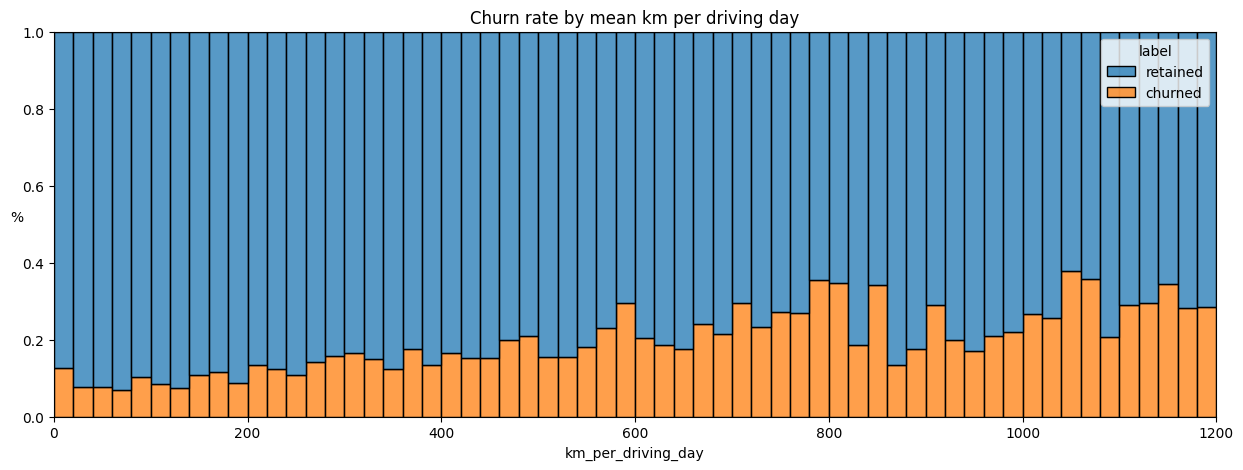

In [157]:
plt.figure(figsize=(15,5))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day')

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

<Axes: xlabel='driving_days', ylabel='Count'>

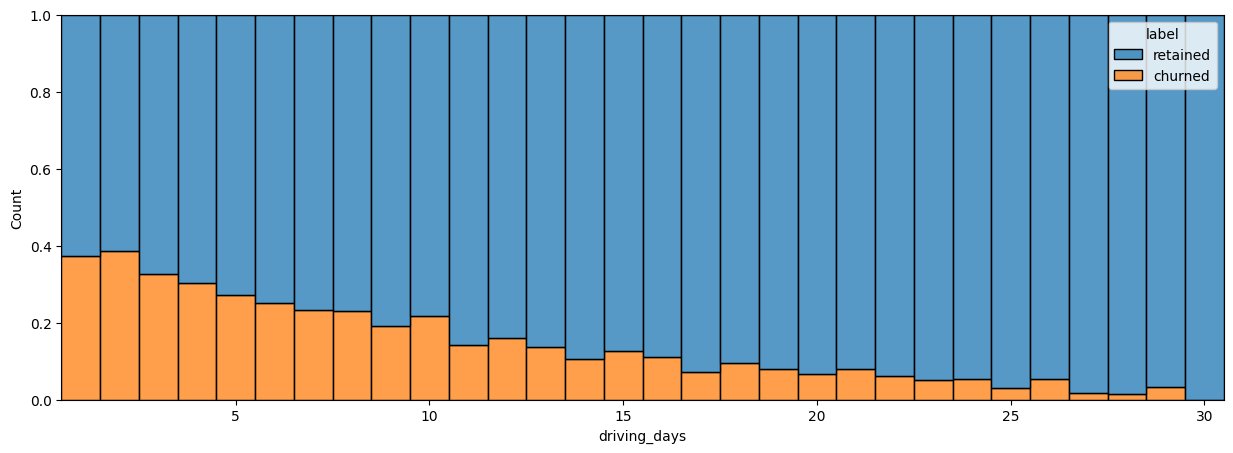

In [158]:
plt.figure(figsize=(15,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(0,32),
             hue='label',
             multiple='fill',
             discrete=True
            )

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

### Handling outliers

The box plots from the previous section indicated that many of these variables have outliers. They are present because of the right-skewed distributions, but it is questionable that some of them are even physically possible.


#### 💡 We'll explore data further using clustering methods and feature engineering to better understand how to deal with outliers

### **Conclusion**

Analysis revealed that the overall churn rate is \~18%, and that this rate is consistent between iPhone users and Android users.

Also, EDA has revealed:

* users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about
* it would be tremendously beneficial to understand the methodology behind "churn": how many days of not using the app to consider the user churned? How does it correlate with `activity_days`?
    > Churn quantifies the number of users who have uninstalled the Waze app or stopped using the app

Important! There are discrepancies and mistakes in the data (it would be helpful to get more precise and clear data)
* `drives` == 0 but `driven_km_drives` being > 0
* discrepancies between values of `activity_days` vs `sessions` and `driving_days` vs `drives`
* unreliable values of `total_sessions`
* inconsistent max values of 30/31 days for columns `activity_days` and `driving_days`
* impossibly large maximum value of `driven_km_drives`(that was over half the circumferene of the earth) and other columns

Incorrect data comprises around 4K rows, which is A LOT. 
